# Code Copy of the Iteration 3

## 01-BU

To find the influences of factors, such as education levels, occupations, and working hours on people’s salaries and build a model to predict unknown people’s salary.

To investigate whether there are significant salary differences between different genders.

## 02-DU

#Load Dataset

In [1]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file='multiple_choice_responses_modefied.csv'
file_other='other_text_responses_modefied.xlsx'

from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("DataLoadingApp").getOrCreate()

# Load data using PySpark
df_spark = spark.read.csv(file, header=True, inferSchema=True)
df_other_spark = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(file_other)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 01:26:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#Explore Data

In [3]:
df_spark.printSchema()

root
 |-- Time from Start to Finish (seconds): integer (nullable = true)
 |-- Q1: string (nullable = true)
 |-- Q2: string (nullable = true)
 |-- Q2_OTHER_TEXT: integer (nullable = true)
 |-- Q3: string (nullable = true)
 |-- Q4: string (nullable = true)
 |-- Q5: string (nullable = true)
 |-- Q5_OTHER_TEXT: integer (nullable = true)
 |-- Q6: string (nullable = true)
 |-- Q7: string (nullable = true)
 |-- Q8: string (nullable = true)
 |-- Q9_Part_1: string (nullable = true)
 |-- Q9_Part_2: string (nullable = true)
 |-- Q9_Part_3: string (nullable = true)
 |-- Q9_Part_4: string (nullable = true)
 |-- Q9_Part_5: string (nullable = true)
 |-- Q9_Part_6: string (nullable = true)
 |-- Q9_Part_7: string (nullable = true)
 |-- Q9_Part_8: string (nullable = true)
 |-- Q9_OTHER_TEXT: integer (nullable = true)
 |-- Q10: string (nullable = true)
 |-- Q11: string (nullable = true)
 |-- Q12_Part_1: string (nullable = true)
 |-- Q12_Part_2: string (nullable = true)
 |-- Q12_Part_3: string (nullable =

In [4]:
from pyspark.sql.functions import sum, col
from functools import reduce
from operator import add

column_nan = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])

total_columns = [col(c) for c in column_nan.columns]
total_sum = reduce(add, total_columns)
total_nan = column_nan.select(total_sum.alias("total_nan")).collect()[0]["total_nan"]

total_nan

23/10/11 01:26:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


3594883

In [5]:
column_nan.head(40)

[Row(Time from Start to Finish (seconds)=0, Q1=0, Q2=0, Q2_OTHER_TEXT=0, Q3=0, Q4=394, Q5=610, Q5_OTHER_TEXT=0, Q6=5715, Q7=6094, Q8=6490, Q9_Part_1=13626, Q9_Part_2=16151, Q9_Part_3=14736, Q9_Part_4=16369, Q9_Part_5=16012, Q9_Part_6=17358, Q9_Part_7=19186, Q9_Part_8=19468, Q9_OTHER_TEXT=0, Q10=7220, Q11=7467, Q12_Part_1=15977, Q12_Part_2=17913, Q12_Part_3=16298, Q12_Part_4=8966, Q12_Part_5=15962, Q12_Part_6=12179, Q12_Part_7=17642, Q12_Part_8=9810, Q12_Part_9=15245, Q12_Part_10=17305, Q12_Part_11=19142, Q12_Part_12=18533, Q12_OTHER_TEXT=0, Q13_Part_1=16764, Q13_Part_2=11032, Q13_Part_3=16567, Q13_Part_4=15874, Q13_Part_5=18974, Q13_Part_6=14598, Q13_Part_7=18197, Q13_Part_8=14913, Q13_Part_9=18434, Q13_Part_10=15239, Q13_Part_11=18226, Q13_Part_12=17845, Q13_OTHER_TEXT=0, Q14=4027, Q14_Part_1_TEXT=0, Q14_Part_2_TEXT=0, Q14_Part_3_TEXT=0, Q14_Part_4_TEXT=0, Q14_Part_5_TEXT=0, Q14_OTHER_TEXT=0, Q15=4090, Q16_Part_1=8913, Q16_Part_2=15262, Q16_Part_3=15493, Q16_Part_4=18230, Q16_Part_5=1

In [6]:
df_spark = df_spark.na.fill('nan')

In [7]:
df = df_spark.toPandas()

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

#Add Visualisations

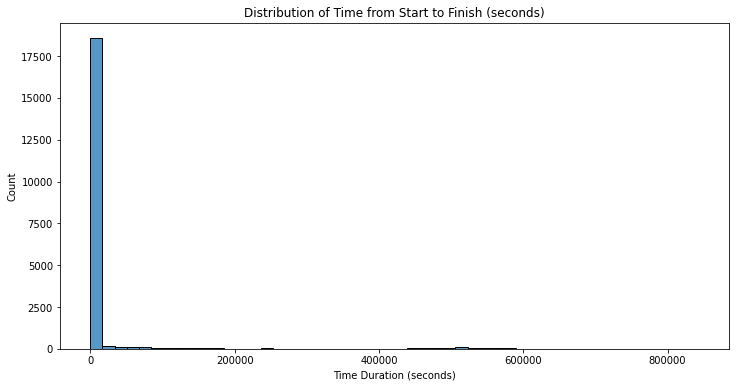

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df['Time from Start to Finish (seconds)'], bins=50)
plt.title("Distribution of Time from Start to Finish (seconds)")
plt.xlabel("Time Duration (seconds)")
plt.show()

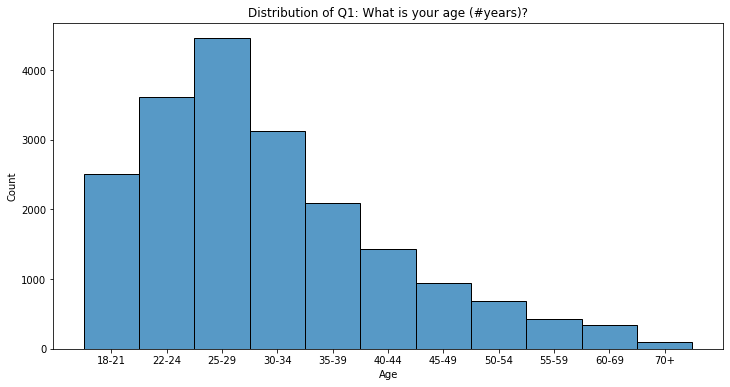

In [9]:
df['Q1'] = pd.Categorical(df['Q1'], ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'], ordered=True)
plt.figure(figsize=(12,6))
sns.histplot(df['Q1'])
plt.title("Distribution of Q1: What is your age (#years)?")
plt.xlabel("Age")
plt.show()

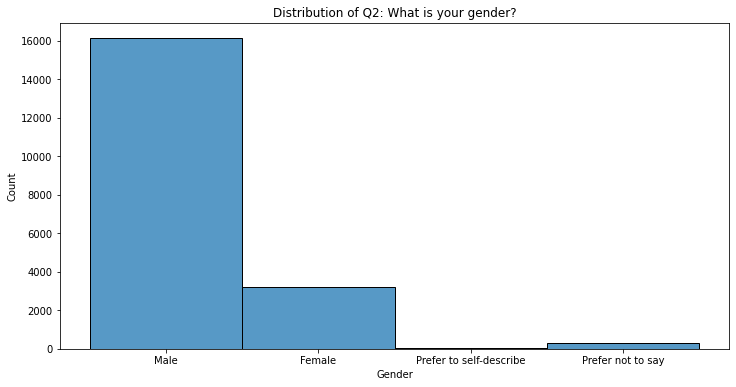

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q2'])
plt.title("Distribution of Q2: What is your gender?")
plt.xlabel("Gender")
plt.show()

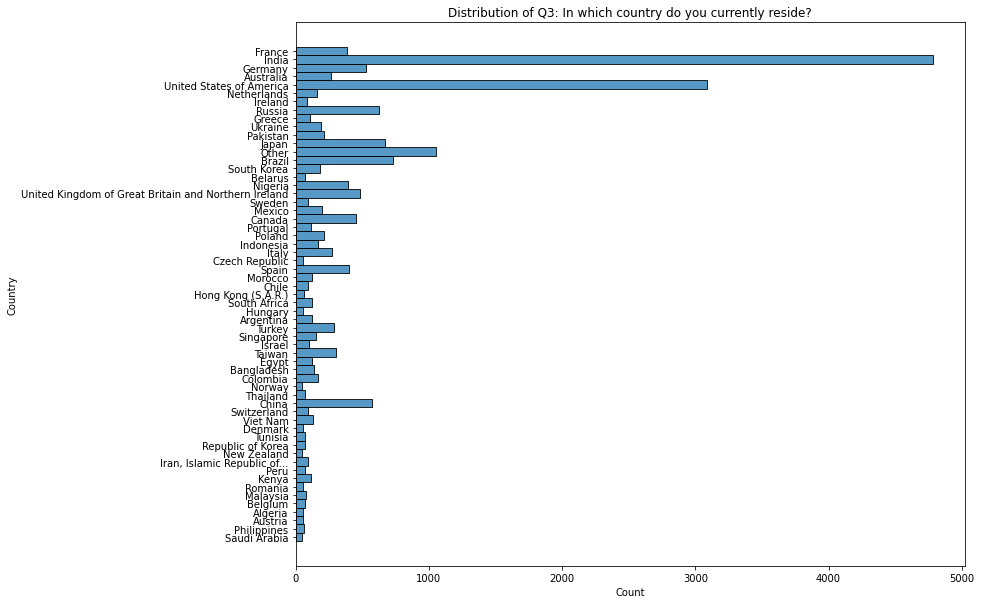

In [11]:
plt.figure(figsize=(12,10))
sns.histplot(data=df, y='Q3')
plt.title("Distribution of Q3: In which country do you currently reside?")
plt.ylabel("Country")
plt.show()

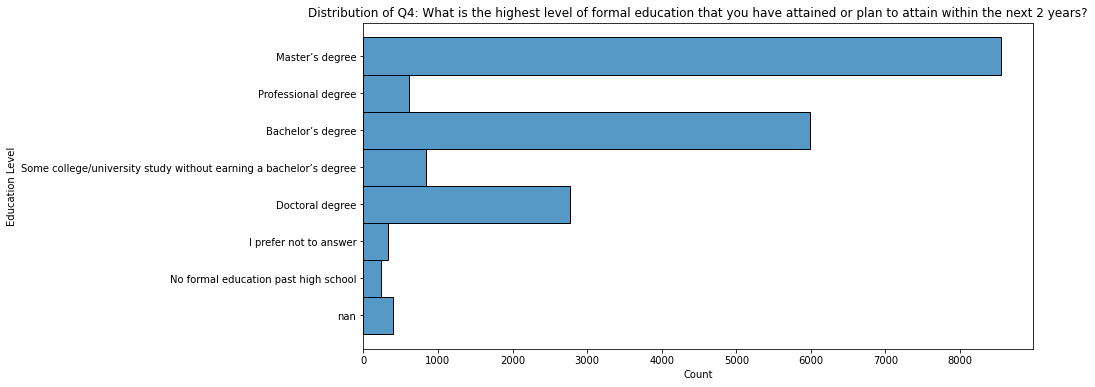

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q4')
plt.title("Distribution of Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?")
plt.ylabel("Education Level")
plt.show()

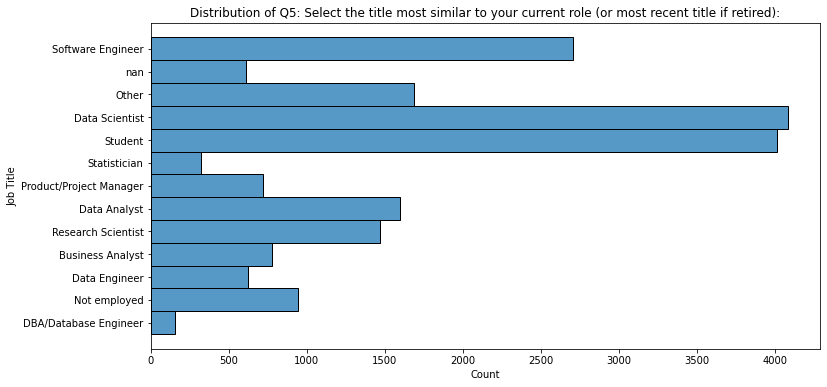

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q5')
plt.title("Distribution of Q5: Select the title most similar to your current role (or most recent title if retired):")
plt.ylabel("Job Title")
plt.show()

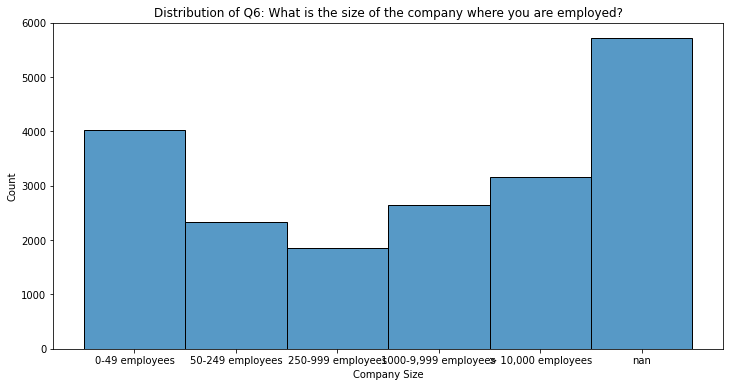

In [14]:
df['Q6'] = pd.Categorical(df['Q6'], ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','> 10,000 employees','nan'])
plt.figure(figsize=(12,6))
sns.histplot(df['Q6'])
plt.title("Distribution of Q6: What is the size of the company where you are employed?")
plt.xlabel("Company Size")
plt.show()

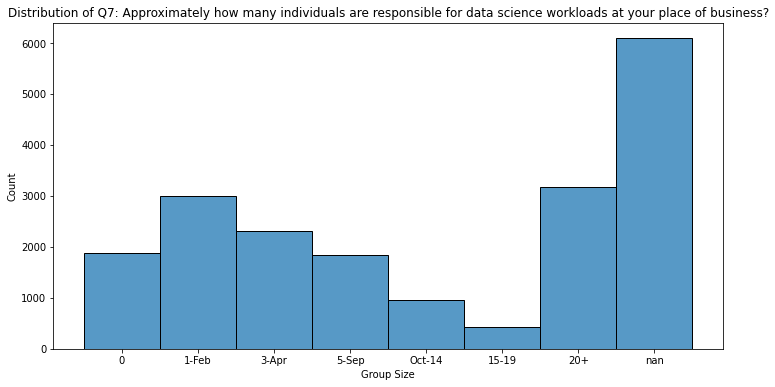

In [15]:
df['Q7'] = pd.Categorical(df['Q7'], ['0','1-Feb','3-Apr','5-Sep','Oct-14','15-19','20+','nan'])
plt.figure(figsize=(12,6))
sns.histplot(df['Q7'])
plt.title("Distribution of Q7: Approximately how many individuals are responsible for data science workloads at your place of business?")
plt.xlabel("Group Size")
plt.show()

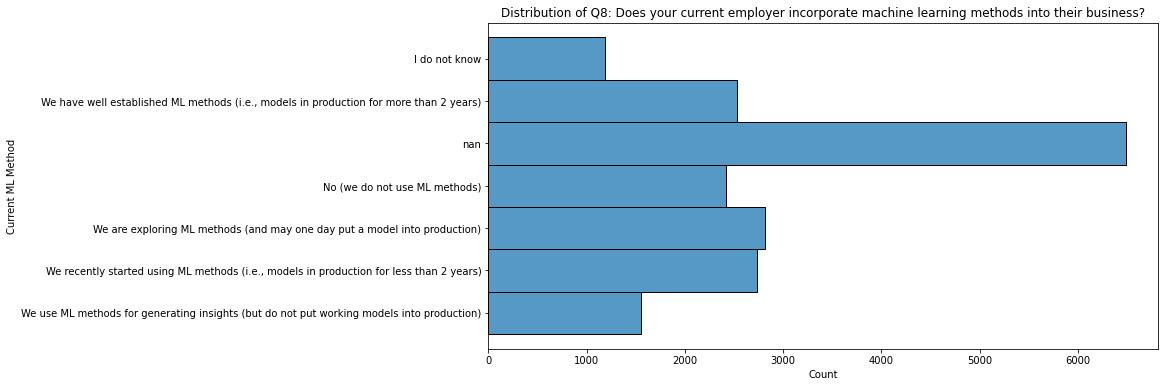

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q8')
plt.title("Distribution of Q8: Does your current employer incorporate machine learning methods into their business?")
plt.ylabel("Current ML Method")
plt.show()

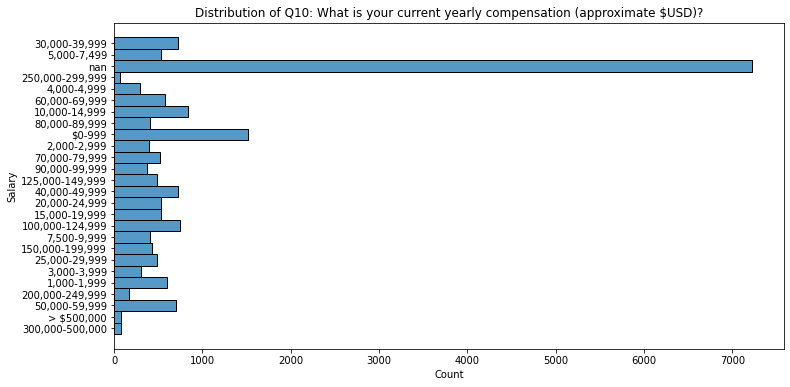

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q10')
plt.title("Distribution of Q10: What is your current yearly compensation (approximate $USD)?")
plt.ylabel("Salary")
plt.show()

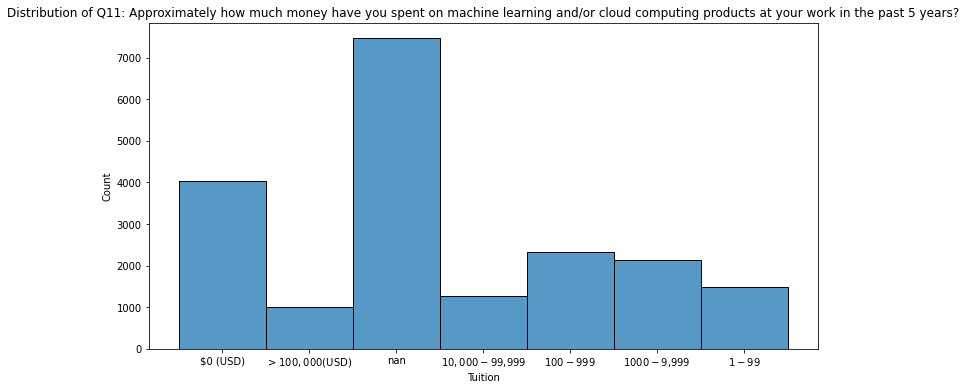

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q11'])
plt.title("Distribution of Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Tuition")
plt.show()

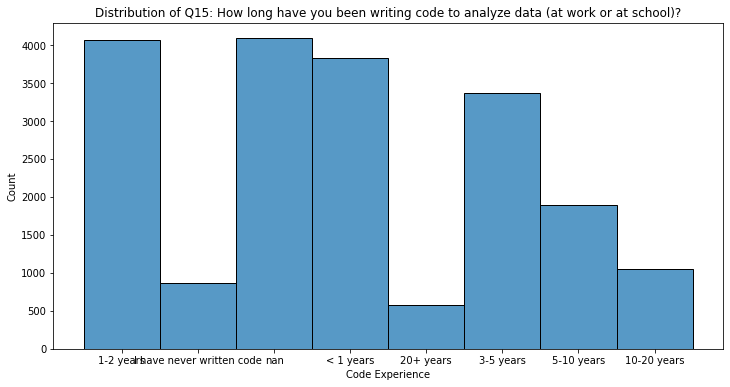

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q15'])
plt.title("Distribution of Q15: How long have you been writing code to analyze data (at work or at school)?")
plt.xlabel("Code Experience")
plt.show()

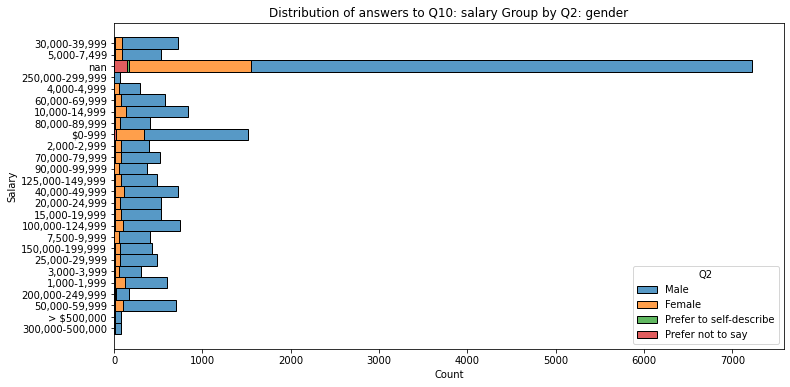

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q10',hue='Q2',multiple='stack')
plt.title("Distribution of answers to Q10: salary Group by Q2: gender")
plt.ylabel("Salary")
plt.show()

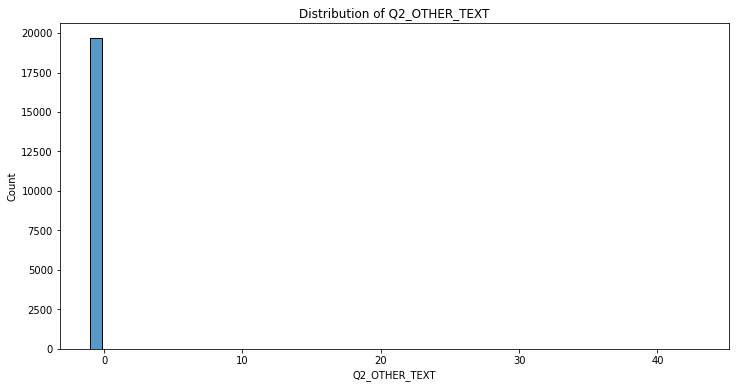

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df['Q2_OTHER_TEXT'], bins=50)
plt.title("Distribution of Q2_OTHER_TEXT")
plt.xlabel("Q2_OTHER_TEXT")
plt.show()

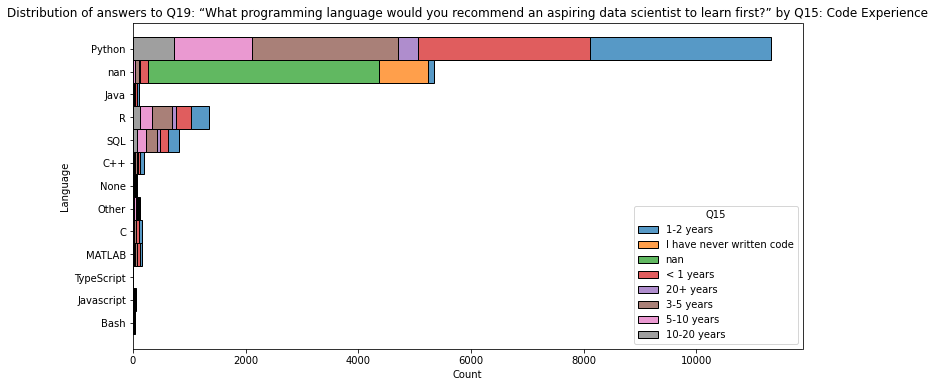

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Q19',hue='Q15',multiple='stack')
plt.title("Distribution of answers to Q19: “What programming language would you recommend an aspiring data scientist to learn first?” by Q15: Code Experience")
plt.ylabel("Language")
plt.show()

## 03-DP

In [23]:
df_spark = spark.read.csv(file, header=True, inferSchema=True)

#Add any pre-processing steps

In [24]:
columns_to_drop_1 = df_spark.columns[df_spark.columns.index('Q12_Part_1'):df_spark.columns.index('Q14_OTHER_TEXT') + 1]
columns_to_drop_2 = df_spark.columns[df_spark.columns.index('Q16_Part_1'):df_spark.columns.index('Q34_OTHER_TEXT') + 1]

df_spark = df_spark.drop(*columns_to_drop_1)
df_spark = df_spark.drop(*columns_to_drop_2)

df_spark.columns

['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q2_OTHER_TEXT',
 'Q3',
 'Q4',
 'Q5',
 'Q5_OTHER_TEXT',
 'Q6',
 'Q7',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_OTHER_TEXT',
 'Q10',
 'Q11',
 'Q15']

In [25]:
df_spark = df_spark.filter(col('Q5') != 'Student')
df_spark = df_spark.filter(col('Q5').isNotNull())

column_nan = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])
column_nan.show()

+-----------------------------------+---+---+-------------+---+---+---+-------------+----+----+----+---------+---------+---------+---------+---------+---------+---------+---------+-------------+----+----+----+
|Time from Start to Finish (seconds)| Q1| Q2|Q2_OTHER_TEXT| Q3| Q4| Q5|Q5_OTHER_TEXT|  Q6|  Q7|  Q8|Q9_Part_1|Q9_Part_2|Q9_Part_3|Q9_Part_4|Q9_Part_5|Q9_Part_6|Q9_Part_7|Q9_Part_8|Q9_OTHER_TEXT| Q10| Q11| Q15|
+-----------------------------------+---+---+-------------+---+---+---+-------------+----+----+----+---------+---------+---------+---------+---------+---------+---------+---------+-------------+----+----+----+
|                                  0|  0|  0|            0|  0|  0|  0|            0|1091|1470|1866|     9002|    11527|    10112|    11745|    11388|    12734|    14562|    14844|            0|2596|2843|2832|
+-----------------------------------+---+---+-------------+---+---+---+-------------+----+----+----+---------+---------+---------+---------+---------+---------+

In [26]:
df_spark = df_spark.filter(col('Q10').isNotNull())

df_spark = df_spark.fillna({'Q11': 'NA', 'Q15': 'NA'})

column_nan = df_spark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_spark.columns])
column_nan.show()

+-----------------------------------+---+---+-------------+---+---+---+-------------+---+---+---+---------+---------+---------+---------+---------+---------+---------+---------+-------------+---+---+---+
|Time from Start to Finish (seconds)| Q1| Q2|Q2_OTHER_TEXT| Q3| Q4| Q5|Q5_OTHER_TEXT| Q6| Q7| Q8|Q9_Part_1|Q9_Part_2|Q9_Part_3|Q9_Part_4|Q9_Part_5|Q9_Part_6|Q9_Part_7|Q9_Part_8|Q9_OTHER_TEXT|Q10|Q11|Q15|
+-----------------------------------+---+---+-------------+---+---+---+-------------+---+---+---+---------+---------+---------+---------+---------+---------+---------+---------+-------------+---+---+---+
|                                  0|  0|  0|            0|  0|  0|  0|            0|  0|  0|  0|     6518|     8990|     7607|     9212|     8863|    10194|    11982|    12258|            0|  0|  0|  0|
+-----------------------------------+---+---+-------------+---+---+---+-------------+---+---+---+---------+---------+---------+---------+---------+---------+---------+---------+-------

In [27]:
df_spark.describe('Time from Start to Finish (seconds)', 'Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT').show()

+-------+-----------------------------------+-------------------+------------------+------------------+
|summary|Time from Start to Finish (seconds)|      Q2_OTHER_TEXT|     Q5_OTHER_TEXT|     Q9_OTHER_TEXT|
+-------+-----------------------------------+-------------------+------------------+------------------+
|  count|                              12497|              12497|             12497|             12497|
|   mean|                 14186.510202448588|-0.9631911658798111|29.216932063695285|-0.250940225654157|
| stddev|                  72866.37928541894|  0.978525338809762|122.20823681233746| 8.257126725535429|
|    min|                                 67|                 -1|                -1|                -1|
|    max|                             843612|                 39|               877|               137|
+-------+-----------------------------------+-------------------+------------------+------------------+



In [28]:
df = df_spark.toPandas()

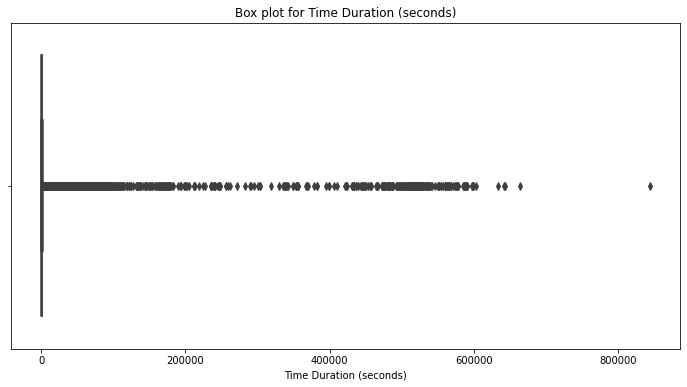

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Time from Start to Finish (seconds)'])
plt.title("Box plot for Time Duration (seconds)")
plt.xlabel("Time Duration (seconds)")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


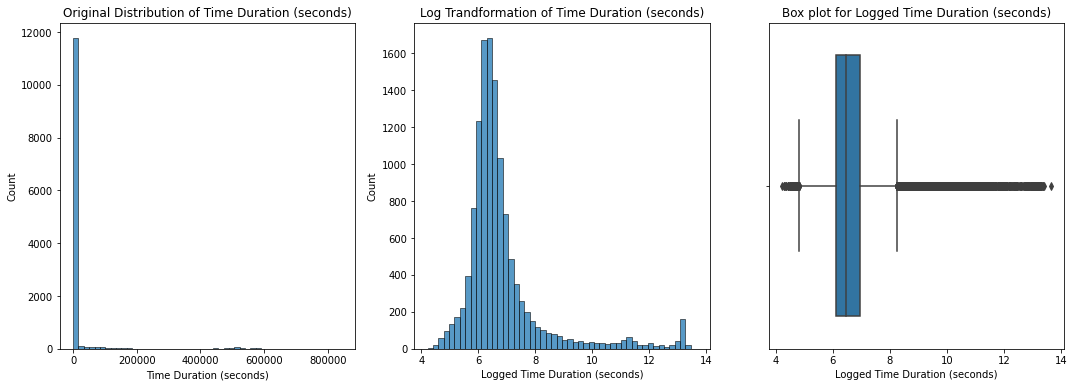

In [30]:
import numpy as np

time_log = np.log(df['Time from Start to Finish (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time from Start to Finish (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_log, ax=ax[1], bins=50)
ax[1].set_title("Log Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Logged Time Duration (seconds)")
sns.boxplot(time_log, ax=ax[2])
ax[2].set_title("Box plot for Logged Time Duration (seconds)")
ax[2].set_xlabel("Logged Time Duration (seconds)")
plt.show()

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


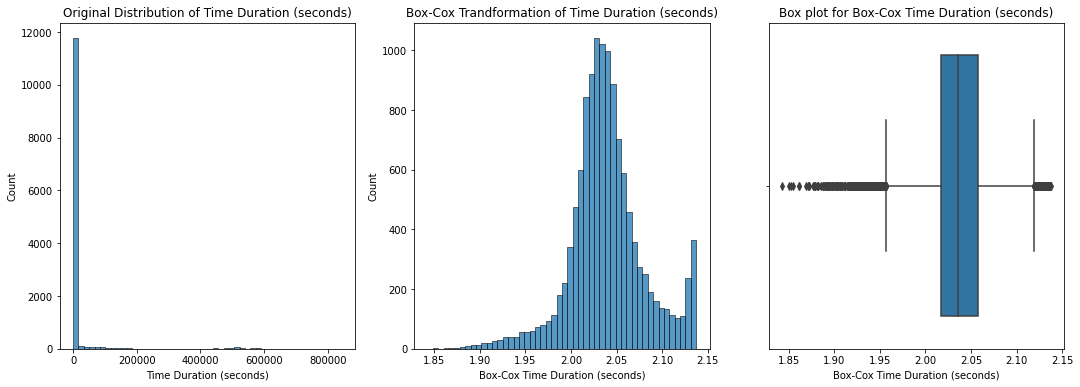

In [31]:
from scipy.stats import boxcox
time_boxcox, lambda_auto = boxcox(df['Time from Start to Finish (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time from Start to Finish (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_boxcox, ax=ax[1], bins=50)
ax[1].set_title("Box-Cox Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Box-Cox Time Duration (seconds)")
sns.boxplot(time_boxcox, ax=ax[2])
ax[2].set_title("Box plot for Box-Cox Time Duration (seconds)")
ax[2].set_xlabel("Box-Cox Time Duration (seconds)")
plt.show()

In [33]:
df['Time from Start to Finish (seconds)'] = time_boxcox
df_spark = spark.createDataFrame(df)

In [35]:
from pyspark.sql.functions import regexp_replace

df_spark = df_spark.withColumn('Q7', regexp_replace('Q7', '3-Apr', '3-4'))
df_spark = df_spark.withColumn('Q7', regexp_replace('Q7', '1-Feb', '1-2'))
df_spark = df_spark.withColumn('Q7', regexp_replace('Q7', '5-Sep', '5-9'))
df_spark = df_spark.withColumn('Q7', regexp_replace('Q7', 'Oct-14', '10-14'))

unique_values = df_spark.select('Q7').distinct()
unique_values.show()

23/10/11 01:27:36 WARN TaskSetManager: Stage 33 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


+-----+
|   Q7|
+-----+
|  5-9|
|    0|
|  3-4|
|  1-2|
|  20+|
|15-19|
|10-14|
+-----+



In [36]:
from pyspark.sql.functions import when, col

df_spark = df_spark.withColumn("Q11", 
                               when(col("Q11") == "$0 (USD)", "$0")
                               .when(col("Q11") == "> $100,000 ($USD)", "> $100,000")
                               .otherwise(col("Q11")))

df_spark.select("Q11").distinct().show()

23/10/11 01:27:40 WARN TaskSetManager: Stage 36 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


+---------------+
|            Q11|
+---------------+
|   $1000-$9,999|
|             $0|
|$10,000-$99,999|
|      $100-$999|
|     > $100,000|
|         $1-$99|
|             NA|
+---------------+



In [37]:
df_spark = (df_spark
            .withColumnRenamed('Time from Start to Finish (seconds)', 'Time Duration (seconds)')
            .withColumnRenamed('Q1', 'Age')
            .withColumnRenamed('Q2', 'Gender')
            .withColumnRenamed('Q3', 'Country')
            .withColumnRenamed('Q4', 'Education')
            .withColumnRenamed('Q5', 'Title')
            .withColumnRenamed('Q6', 'Company Size')
            .withColumnRenamed('Q7', 'Group Size')
            .withColumnRenamed('Q8', 'ML Incorporation')
            .withColumnRenamed('Q10', 'Salary')
            .withColumnRenamed('Q11', 'Tuition')
            .withColumnRenamed('Q15', 'Code Experience'))
df_spark.columns

['Time Duration (seconds)',
 'Age',
 'Gender',
 'Q2_OTHER_TEXT',
 'Country',
 'Education',
 'Title',
 'Q5_OTHER_TEXT',
 'Company Size',
 'Group Size',
 'ML Incorporation',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_OTHER_TEXT',
 'Salary',
 'Tuition',
 'Code Experience']

In [38]:
df_spark = df_spark.na.fill('0')
replacement_values = {
    'Q9_Part_1': 'Analyze and understand data to influence product or business decisions',
    'Q9_Part_2': 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
    'Q9_Part_3': 'Build prototypes to explore applying machine learning to new areas',
    'Q9_Part_4': 'Build and/or run a machine learning service that operationally improves my product or workflows',
    'Q9_Part_5': 'Experimentation and iteration to improve existing ML models',
    'Q9_Part_6': 'Do research that advances the state of the art of machine learning',
    'Q9_Part_7': 'None of these activities are an important part of my role at work',
    'Q9_Part_8': 'Other'
}
for column, value in replacement_values.items():
    df_spark = df_spark.withColumn(column, when(col(column) == value, '1').otherwise(col(column)))
column_renames = {
    'Q9_Part_1': 'Analyze Data',
    'Q9_Part_2': 'Build Infrastructure',
    'Q9_Part_3': 'Build Prototypes',
    'Q9_Part_4': 'Build ML Service',
    'Q9_Part_5': 'Experimentation',
    'Q9_Part_6': 'Research',
    'Q9_Part_7': 'None',
    'Q9_Part_8': 'Other'
}
for old_name, new_name in column_renames.items():
    df_spark = df_spark.withColumnRenamed(old_name, new_name)
columns_to_show = ['Analyze Data', 'Build Infrastructure', 'Build Prototypes', 'Build ML Service', 'Experimentation', 'Research', 'None', 'Other']
df_spark.select(columns_to_show).show()

+------------+--------------------+----------------+----------------+---------------+--------+----+-----+
|Analyze Data|Build Infrastructure|Build Prototypes|Build ML Service|Experimentation|Research|None|Other|
+------------+--------------------+----------------+----------------+---------------+--------+----+-----+
|           0|                   0|               0|               0|              0|       0|   0|    0|
|           1|                   1|               1|               1|              0|       0|   0|    0|
|           0|                   0|               0|               0|              0|       0|   0|    0|
|           0|                   0|               0|               0|              0|       0|   0|    0|
|           0|                   0|               1|               0|              0|       1|   0|    0|
|           1|                   0|               0|               0|              1|       1|   0|    0|
|           1|                   0|           

23/10/11 01:27:51 WARN TaskSetManager: Stage 39 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


In [39]:
#df_merge_spark = spark.read.csv(file, header=True, inferSchema=True)

#join_column_merge = df_merge_spark.columns[0]
#join_column_other = df_other_spark.columns[0]

#df_total_spark = df_merge_spark.join(df_other_spark, on=col(join_column_merge) == col(join_column_other), how='inner').drop(join_column_other)

#df_total_spark.show()

In [39]:
df_spark = df_spark.drop('Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT')
df_spark.show()

23/10/11 01:27:57 WARN TaskSetManager: Stage 40 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


+-----------------------+-----+------+--------------------+-------------------+--------------------+--------------------+----------+--------------------+------------+--------------------+----------------+----------------+---------------+--------+----+-----+---------------+---------------+--------------------+
|Time Duration (seconds)|  Age|Gender|             Country|          Education|               Title|        Company Size|Group Size|    ML Incorporation|Analyze Data|Build Infrastructure|Build Prototypes|Build ML Service|Experimentation|Research|None|Other|         Salary|        Tuition|     Code Experience|
+-----------------------+-----+------+--------------------+-------------------+--------------------+--------------------+----------+--------------------+------------+--------------------+----------------+----------------+---------------+--------+----+-----+---------------+---------------+--------------------+
|     2.0247413329960464|22-24|  Male|              France|    Mast

## 04-DT

#Add any transformation steps

In [40]:
df_spark.printSchema()

print(f"Total number of rows: {df_spark.count()}")

root
 |-- Time Duration (seconds): double (nullable = true)
 |-- Age: string (nullable = false)
 |-- Gender: string (nullable = false)
 |-- Country: string (nullable = false)
 |-- Education: string (nullable = false)
 |-- Title: string (nullable = false)
 |-- Company Size: string (nullable = false)
 |-- Group Size: string (nullable = false)
 |-- ML Incorporation: string (nullable = false)
 |-- Analyze Data: string (nullable = false)
 |-- Build Infrastructure: string (nullable = false)
 |-- Build Prototypes: string (nullable = false)
 |-- Build ML Service: string (nullable = false)
 |-- Experimentation: string (nullable = false)
 |-- Research: string (nullable = false)
 |-- None: string (nullable = false)
 |-- Other: string (nullable = false)
 |-- Salary: string (nullable = false)
 |-- Tuition: string (nullable = false)
 |-- Code Experience: string (nullable = false)



23/10/11 01:28:03 WARN TaskSetManager: Stage 41 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


Total number of rows: 12497


In [42]:
pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
from scipy.stats import chi2_contingency

df = df_spark.toPandas()

df_categorical = df.drop(columns = ['Time Duration (seconds)', 'Salary'])
p = {}
for i in df_categorical.columns:
    ct = pd.crosstab(df_categorical[i], df['Salary'])
    res = chi2_contingency(ct)
    p[i] = res[1]
p

23/10/11 01:28:12 WARN TaskSetManager: Stage 44 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.


{'Age': 0.0,
 'Gender': 4.151080553477964e-14,
 'Country': 0.0,
 'Education': 6.897442695517074e-74,
 'Title': 7.3641337801299e-61,
 'Company Size': 1.9634398222888516e-163,
 'Group Size': 4.503749172514538e-130,
 'ML Incorporation': 2.00986628689866e-208,
 'Analyze Data': 9.170698412363763e-107,
 'Build Infrastructure': 1.9101131424115792e-65,
 'Build Prototypes': 1.6726318705271823e-188,
 'Build ML Service': 3.474962134690186e-57,
 'Experimentation': 2.6865638876807383e-104,
 'Research': 1.310849707295184e-13,
 'None': 0.007237333453573411,
 'Other': 0.2990994829021082,
 'Tuition': 0.0,
 'Code Experience': 0.0}

In [43]:
df_spark = df_spark.drop('Other')
df_spark = df_spark.dropna(subset=['Time Duration (seconds)'])
df = df_spark.toPandas()

from scipy.stats import stats
groups = []
for salary in df['Salary'].unique():
    group = df['Time Duration (seconds)'][df['Salary']== salary]
    groups.append(group)
    
fvalue, pvalue = stats.f_oneway(*groups)
fvalue

23/10/11 01:28:25 WARN TaskSetManager: Stage 50 contains a task of very large size (2452 KiB). The maximum recommended task size is 1000 KiB.
/tmp/ipykernel_10022/1030251723.py:11: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  fvalue, pvalue = stats.f_oneway(*groups)


3.4969069851753147

In [44]:
pvalue

1.5386083567456994e-08

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


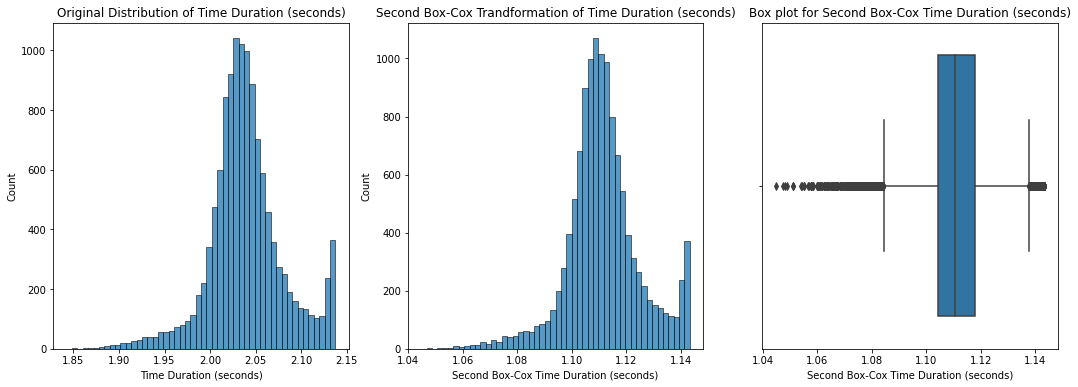

In [45]:
time_sec_boxcox = np.log(df['Time Duration (seconds)'] + 1)

fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(df['Time Duration (seconds)'], ax=ax[0], bins=50)
ax[0].set_title("Original Distribution of Time Duration (seconds)")
ax[0].set_xlabel("Time Duration (seconds)")
sns.histplot(time_sec_boxcox, ax=ax[1], bins=50)
ax[1].set_title("Second Box-Cox Trandformation of Time Duration (seconds)")
ax[1].set_xlabel("Second Box-Cox Time Duration (seconds)")
sns.boxplot(time_sec_boxcox, ax=ax[2])
ax[2].set_title("Box plot for Second Box-Cox Time Duration (seconds)")
ax[2].set_xlabel("Second Box-Cox Time Duration (seconds)")
plt.show()

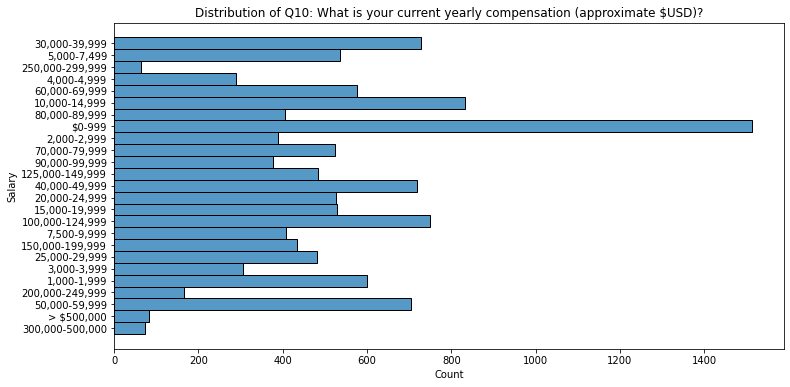

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, y='Salary')
plt.title("Distribution of Q10: What is your current yearly compensation (approximate $USD)?")
plt.ylabel("Salary")
plt.show()

In [47]:
df['Salary'].unique()

array(['30,000-39,999', '5,000-7,499', '250,000-299,999', '4,000-4,999',
       '60,000-69,999', '10,000-14,999', '80,000-89,999', '$0-999',
       '2,000-2,999', '70,000-79,999', '90,000-99,999', '125,000-149,999',
       '40,000-49,999', '20,000-24,999', '15,000-19,999',
       '100,000-124,999', '7,500-9,999', '150,000-199,999',
       '25,000-29,999', '3,000-3,999', '1,000-1,999', '200,000-249,999',
       '50,000-59,999', '> $500,000', '300,000-500,000'], dtype=object)

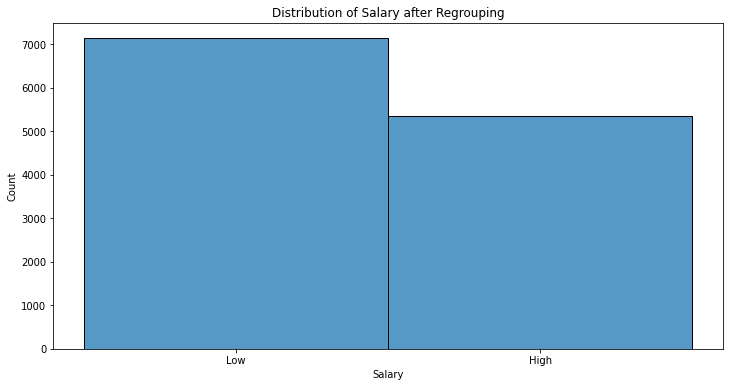

In [48]:
low_salary = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999','15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999']
high_salary = ['250,000-299,999', '60,000-69,999', '80,000-89,999','70,000-79,999', '90,000-99,999', '125,000-149,999','40,000-49,999', '100,000-124,999', '150,000-199,999','200,000-249,999', '50,000-59,999', '> $500,000','300,000-500,000']
df['Salary'] = df['Salary'].replace(low_salary, 'Low')
df['Salary'] = df['Salary'].replace(high_salary, 'High')

plt.figure(figsize=(12,6))
sns.histplot(df['Salary'])
plt.title("Distribution of Salary after Regrouping")
plt.xlabel("Salary")
plt.show()

In [49]:
df['Salary'].unique()

array(['Low', 'High'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time Duration (seconds)  12497 non-null  float64
 1   Age                      12497 non-null  object 
 2   Gender                   12497 non-null  object 
 3   Country                  12497 non-null  object 
 4   Education                12497 non-null  object 
 5   Title                    12497 non-null  object 
 6   Company Size             12497 non-null  object 
 7   Group Size               12497 non-null  object 
 8   ML Incorporation         12497 non-null  object 
 9   Analyze Data             12497 non-null  object 
 10  Build Infrastructure     12497 non-null  object 
 11  Build Prototypes         12497 non-null  object 
 12  Build ML Service         12497 non-null  object 
 13  Experimentation          12497 non-null  object 
 14  Research              

In [51]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.preprocessing import LabelEncoder
df['Salary'] = LabelEncoder().fit_transform(df['Salary'])
df['Salary'] = 1 - df['Salary']

binary_columns=['Analyze Data', 'Build Infrastructure','Build Prototypes','Build ML Service', 'Experimentation', 'Research', 'None']
for col in binary_columns:
    df[col] = df[col].astype(int)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Age', 'Gender', 'Country', 'Education', 'Title', 'Company Size',
       'Group Size', 'ML Incorporation', 'Tuition', 'Code Experience'],
      dtype='object')

In [53]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


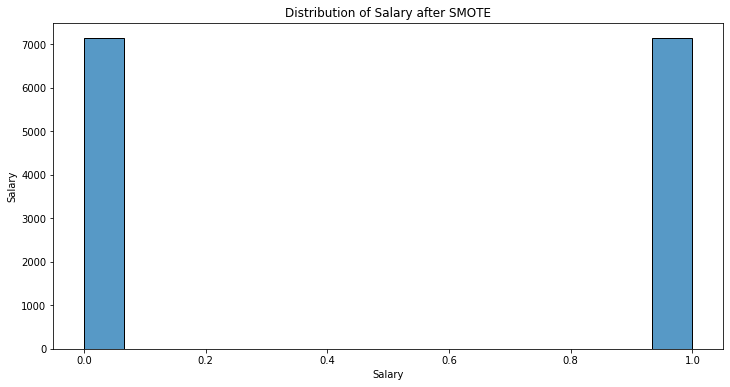

In [54]:
df = pd.get_dummies(df,columns=categorical_columns)

from imblearn.over_sampling import SMOTE

X = df.drop('Salary', axis=1)
y = df['Salary']

X_SMOTE, y_SMOTE = SMOTE().fit_resample(X,y)

plt.figure(figsize=(12,6))
sns.histplot(data=y_SMOTE)
plt.title("Distribution of Salary after SMOTE")
plt.ylabel("Salary")
plt.show()

In [ ]:
df = pd.concat([X_SMOTE,pd.DataFrame(y_SMOTE)],axis=1)

## 05-DMM

Identify the Data Mining method
Describe how it aligns with the objectives

## 06-DMA

Load relevant algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cl_r = classification_report(y_test, y_pred)
accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier(n_estimators=100, random_state=42)
clf_random.fit(X_train, y_train)
y_pred = clf_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred)
cl_r_random = classification_report(y_test, y_pred)
accuracy_random

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

clf_cat = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss')
clf_cat.fit(X_train, y_train)
y_pred = clf_cat.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred)
cl_r_cat = classification_report(y_test, y_pred)
accuracy_cat

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_etr = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_etr.fit(X_train, y_train)
y_pred = clf_etr.predict(X_test)
accuracy_etr = accuracy_score(y_test, y_pred)
cl_r_etr = classification_report(y_test, y_pred)
accuracy_etr

## 07-DM

Execute DM task

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.model_selection import GridSearchCV

In [ ]:
from catboost import CatBoostClassifier

clf_ini = CatBoostClassifier(iterations=1500, learning_rate=0.03, loss_function='Logloss')
clf_ini.fit(X_train, y_train)
y_pred = clf_ini.predict(X_test)
accuracy_ini = accuracy_score(y_test, y_pred)
cl_r_ini = classification_report(y_test, y_pred)
accuracy_ini

In [ ]:
#param_grid = {'iterations': [1000, 2000, 3000], 'learning_rate': [0.01, 0.05, 0.1], 'depth': [4,6,10]}

#clf_cat = CatBoostClassifier()

#grid_search = GridSearchCV(clf_cat, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

#grid_search.best_params_

In [ ]:
clf_gri = CatBoostClassifier(iterations=1000, depth=4, learning_rate=0.1, loss_function='Logloss', verbose=50)
clf_gri.fit(X_train, y_train)
y_pred = clf_gri.predict(X_test)
accuracy_gri = accuracy_score(y_test, y_pred)
cl_r_gri = classification_report(y_test, y_pred)
accuracy_gri

In [ ]:
clf_ini.feature_importances_

In [ ]:
clf_gri.feature_importances_

In [ ]:
feature_importances = clf_gri.feature_importances_
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f"{name}: {score}")

In [ ]:
evals_result = clf_gri.get_evals_result()
train_errors = evals_result['learn']['Logloss']

iterations = list(range(len(train_errors)))

plt.plot(iterations, train_errors, label='Train', color='blue')

plt.title('Training Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(clf_gri)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, max_display=X_train.shape[1])

## 08-INT

Summarise Results

In [ ]:
country_importances = [(name, feature_importances) for name, feature_importances in zip(feature_names, feature_importances) if name.startswith('Country_')]
country_importances = sorted(country_importances, key=lambda x: x[1], reverse=True)
country_importances_sum = 0
for name, country_importances in country_importances:
    country_importances_sum += country_importances
    print(f"{name}: {country_importances}")
country_importances_sum

In [ ]:
gender_importances = [(name, feature_importances) for name, feature_importances in zip(feature_names, feature_importances) if name.startswith('Gender_')]
gender_importances = sorted(gender_importances, key=lambda x: x[1], reverse=True)
gender_importances_sum = 0
for name, gender_importances in gender_importances:
    gender_importances_sum += gender_importances
    print(f"{name}: {gender_importances}")
gender_importances_sum

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_gri, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'iterations': [1250, 1500, 1750], 'learning_rate': [0.1], 'depth': [4]}

clf_cat = CatBoostClassifier()

grid_search = GridSearchCV(clf_cat, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

Add relevant tables or graphs

In [ ]:
clf_new = CatBoostClassifier(iterations=1250, depth=4, learning_rate=0.1, loss_function='Logloss', verbose=50)
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
accuracy_new = accuracy_score(y_test, y_pred)
cl_r_new = classification_report(y_test, y_pred)
accuracy_new

In [ ]:
scores = cross_val_score(clf_new, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))